In [ ]:
from pandas import concat
from src.utils.data import get_all_data
from src.utils.misc_functions import aggregate_results
from src.utils.data import normalize_df


models = ["llama3", "typhoon15", "qwen15", "sailor", "qwen25", "otg", "gemma2", "llama31"]
tasks = {
    "short": ["mmlu", "thai_exam", "wti_mc"],
    "long": ["wti_cqa", "wti_sum"],
}

# Result preparation

In [2]:
data = {
    task: get_all_data(task=task)
    for task in tasks["short"]
}

Loading data for [MMLU]: 100%|██████████| 8/8 [00:41<00:00,  5.15s/it]


Common questions for [MMLU]: 14042


Loading data for [THAI_EXAM]: 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]


Common questions for [THAI_EXAM]: 583


Loading data for [WTI_MC]: 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]

Common questions for [WTI_MC]: 787


In [3]:
data.update({
    task: get_all_data(task=task)
    for task in tasks["long"]
})

Loading data for [WTI_CQA]: 100%|██████████| 8/8 [02:31<00:00, 18.93s/it]


Common questions for [WTI_CQA]: 741


Loading data for [WTI_SUM]: 100%|██████████| 8/8 [02:56<00:00, 22.04s/it]

Common questions for [WTI_SUM]: 793


In [4]:
data_agg = {
    task: aggregate_results(d_)
    for task, d_ in data.items()
}

In [ ]:
result = {}
for type_, tasks_ in tasks.items():

    d_agg = []
    for task in tasks_:
        data_agg[task]["task"] = task
        d_agg.append(data_agg[task])

    d_ = concat(
        d_agg,
        ignore_index=True,
    )
    
    result[type_] = normalize_df(d_, tasks_)

In [16]:
result["short"]

,model,experiment,accuracy,uncertainty,accuracy_revised,answer_pred_revised,ifhr,temperature,task,model_type
0,llama3,en_en,0.606801,0.350071,0.606801,0.350071,0.000064,1.0,MMLU,Base
1,qwen15,en_en,0.000000,1.540200,0.216137,1.391730,0.792408,1.0,MMLU,Base
2,qwen25,en_en,0.000000,1.385335,0.368081,1.225596,0.446745,1.0,MMLU,Base
3,otg,en_en,0.000000,0.561357,0.587644,0.548167,0.137096,1.0,MMLU,CPT
4,sailor,en_en,0.000057,1.175968,0.390678,0.999252,0.288178,1.0,MMLU,CPT
...,...,...,...,...,...,...,...,...,...,...
67,gemma2,th_th,0.536595,0.193259,0.536722,0.191549,0.009022,1.0,WTI - MC,MLLM
68,llama31,en_en,0.457052,0.561544,0.457052,0.561544,0.004828,1.0,WTI - MC,MLLM
69,llama31,en_th,0.445616,0.694799,0.445616,0.694799,0.006989,1.0,WTI - MC,MLLM
70,llama31,th_en,0.459212,0.643059,0.459339,0.642433,0.012452,1.0,WTI - MC,MLLM


In [17]:
result["long"]

,model,experiment,uncertainty,rouge,ifhr,wle,temperature,task,model_type
0,llama3,en_en_en,1.881896,0.343458,0.000675,0.094450,1.0,WTI - CQA,Base
1,llama3,en_en_th,4.536306,0.097506,0.431489,0.543618,1.0,WTI - CQA,Base
2,llama3,en_th_en,3.483138,0.284994,0.350069,0.291732,1.0,WTI - CQA,Base
3,llama3,en_th_th,2.926878,0.313553,0.122084,0.264820,1.0,WTI - CQA,Base
4,llama3,th_en_en,1.872364,0.367292,0.000135,0.095501,1.0,WTI - CQA,Base
...,...,...,...,...,...,...,...,...,...
123,llama31,en_th_th,4.497624,0.310378,0.050946,0.470976,1.0,WTI - SUM,MLLM
124,llama31,th_en_en,4.819253,0.295461,0.255979,0.368487,1.0,WTI - SUM,MLLM
125,llama31,th_en_th,6.769542,0.143937,0.182976,0.972354,1.0,WTI - SUM,MLLM
126,llama31,th_th_en,7.583318,0.049054,0.890066,0.390725,1.0,WTI - SUM,MLLM


In [18]:
base_dir = "../data/analysis"
result["short"].to_csv(f"{base_dir}/short_form_generation_results.csv", index=False)
result["long"].to_csv(f"{base_dir}/long_form_generation_results.csv", index=False)

# Viz examples

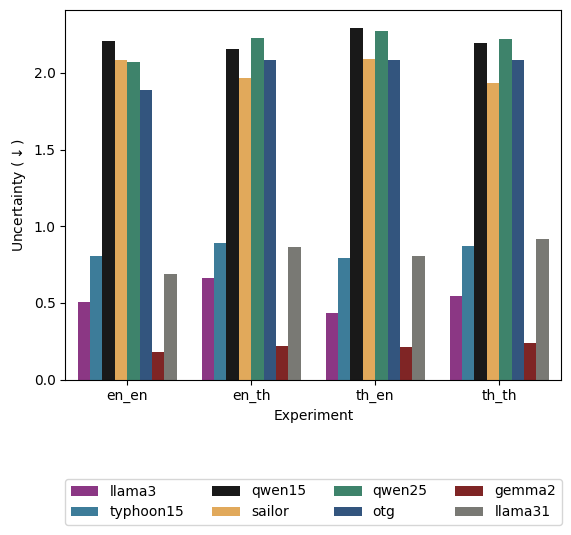

In [ ]:
from src.utils.viz import plot_barchart
from src.utils.viz import subplot_histogram_curve
from src.utils.viz import handle_metric_name
from src.utils.viz import plot_barchat_by_metric


plot_barchart(data_agg["thai_exam"], models, metric="uncertainty")

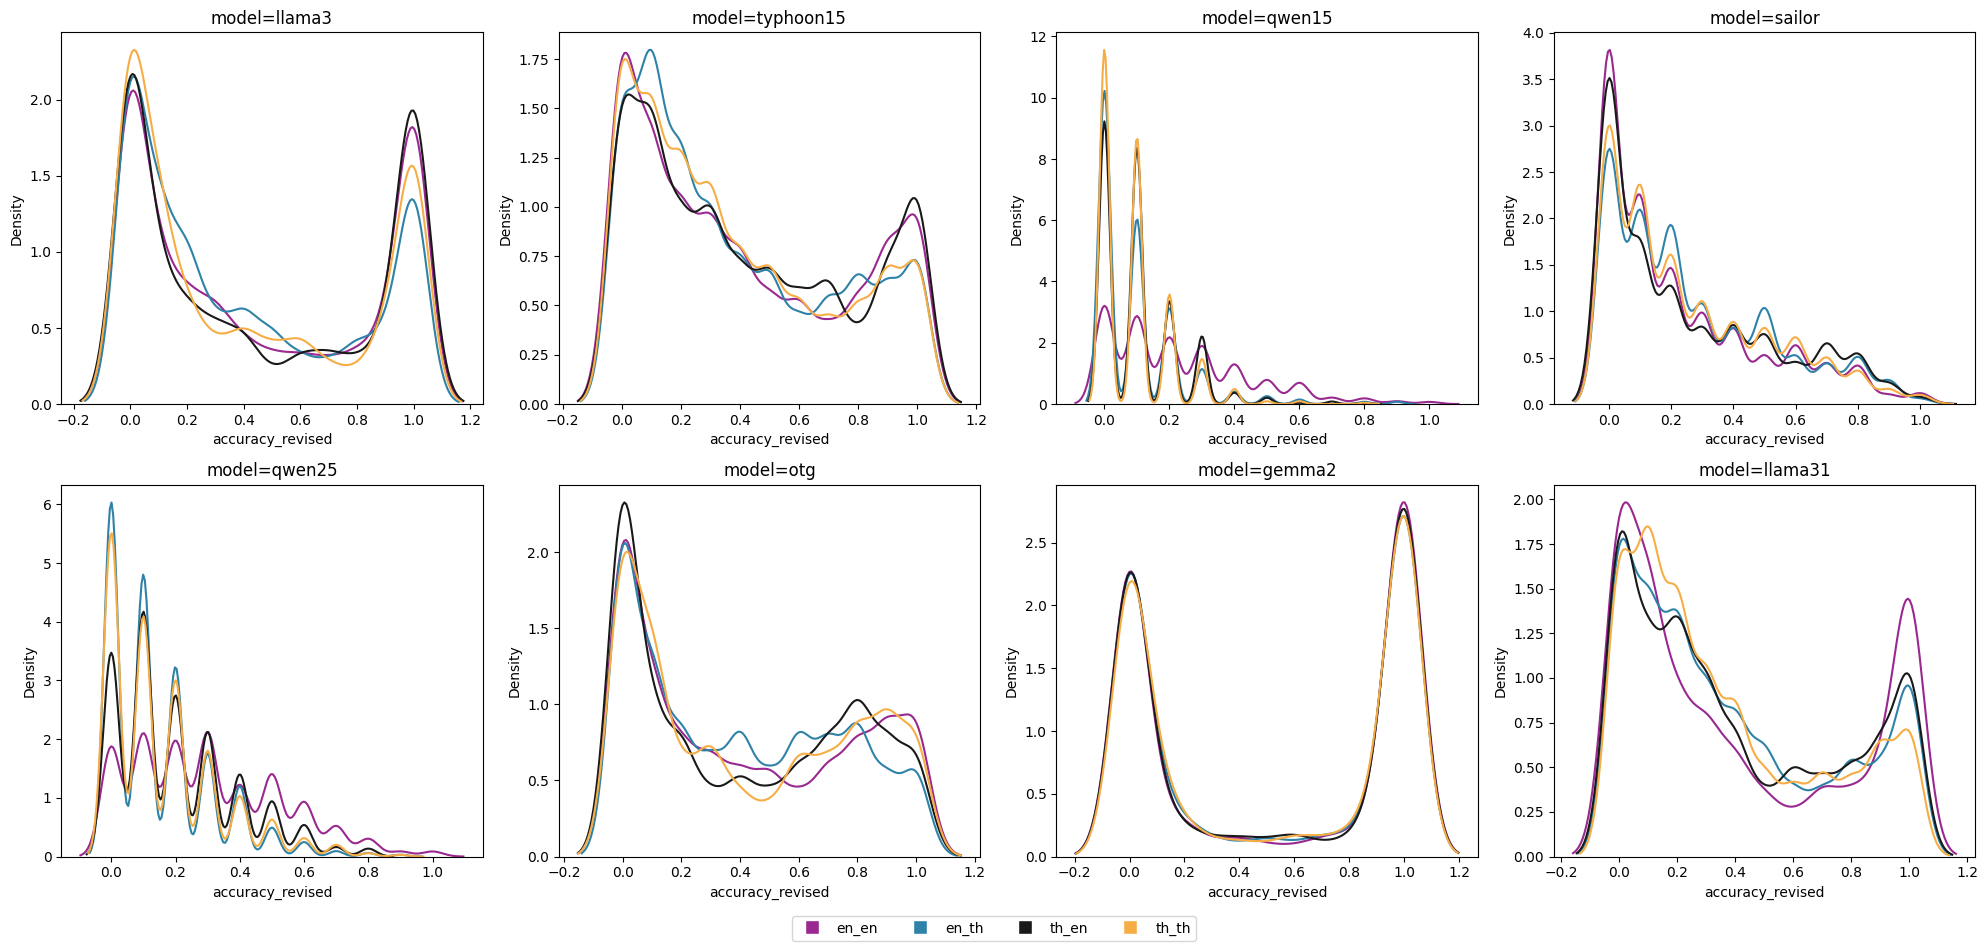

In [6]:
subplot_histogram_curve(
    data["thai_exam"], 
    metric="accuracy_revised",
    models=models,
    experiments=["en_en", "en_th", "th_en", "th_th"],
)

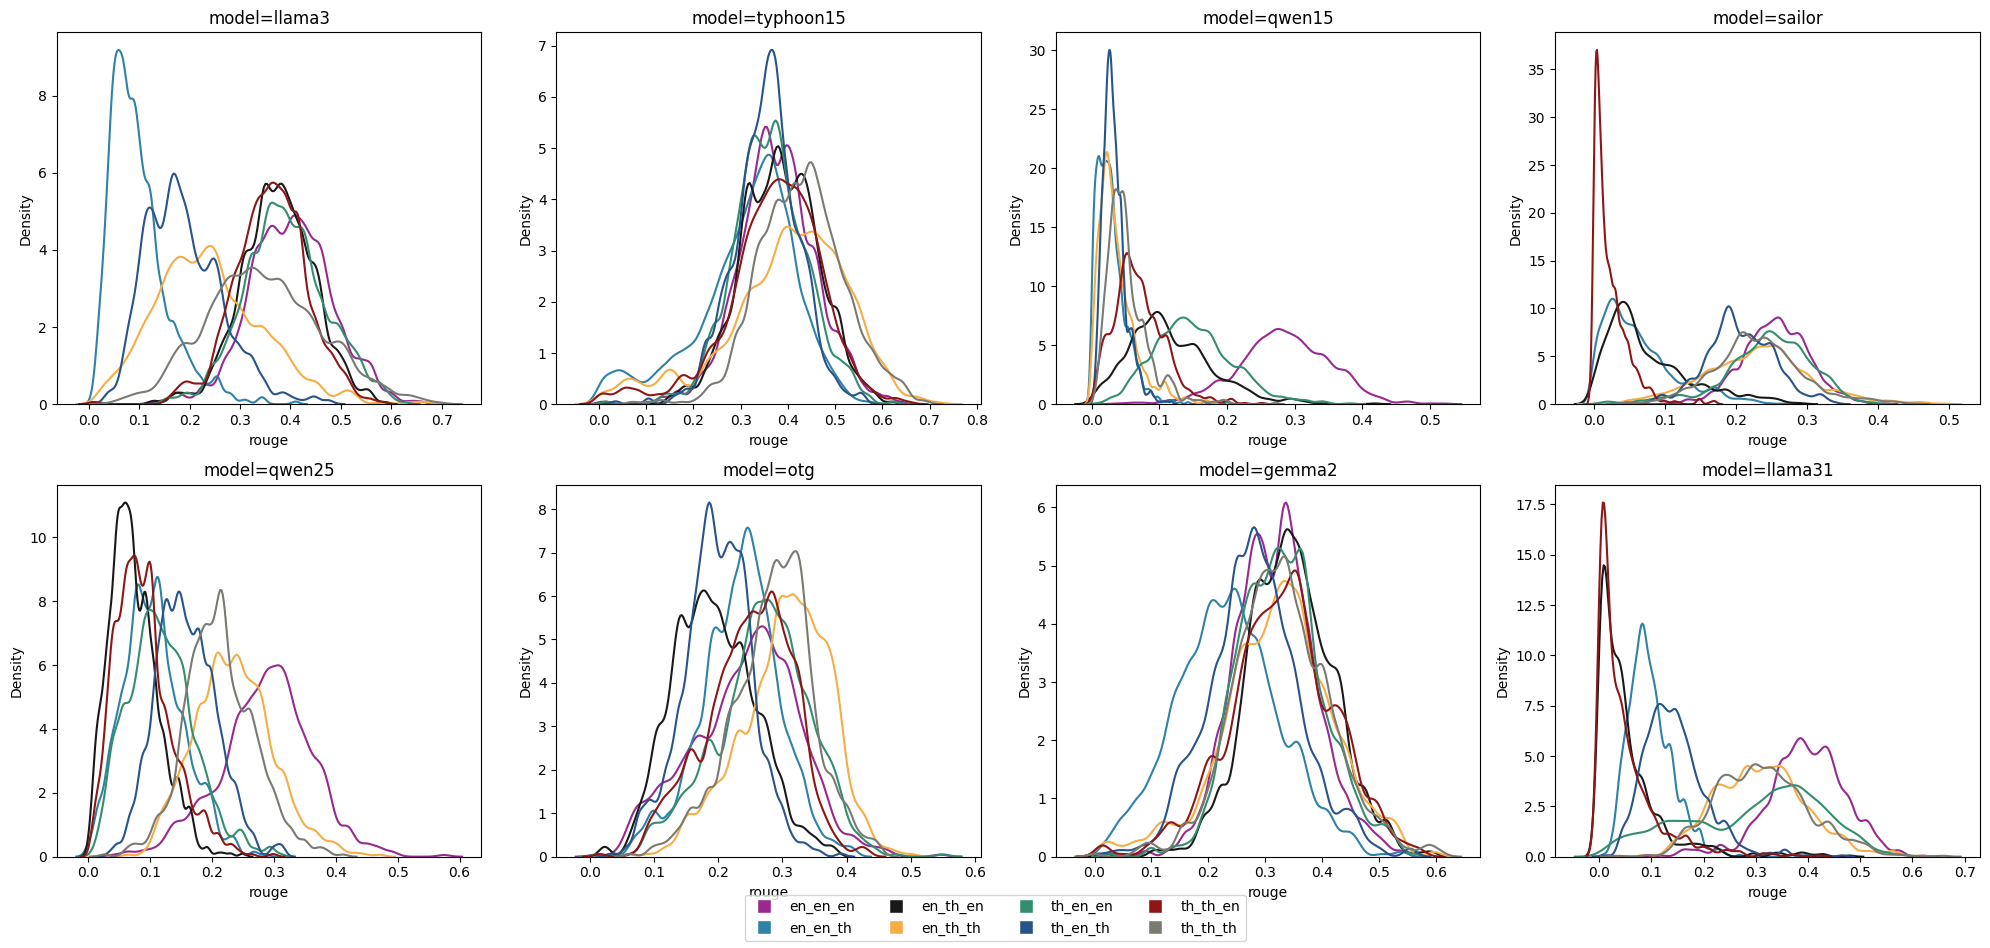

In [7]:
poss_lang = ["en", "th"]
exprs = [
    f"{inst_lang}_{in_lang}_{out_lang}"
    for inst_lang in poss_lang
    for in_lang in poss_lang
    for out_lang in poss_lang
]

subplot_histogram_curve(
    data["wti_sum"], 
    metric="rouge",
    models=models,
    experiments=exprs,
)

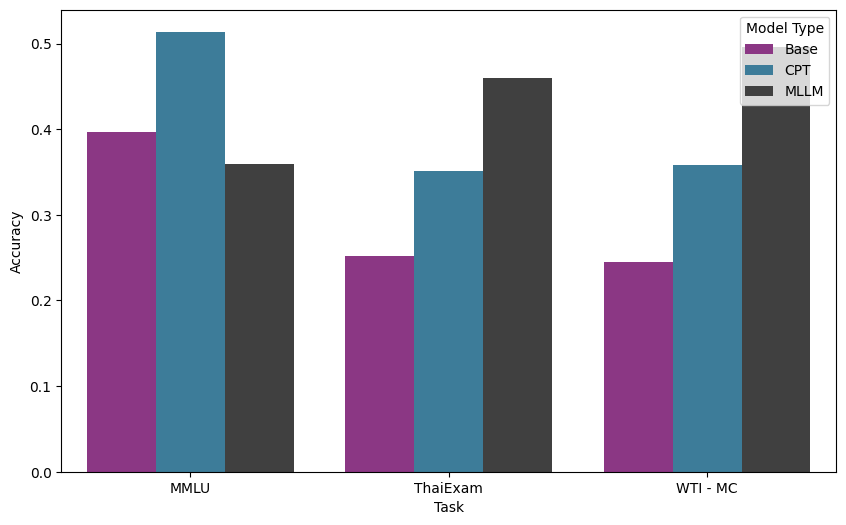

In [ ]:
plot_barchat_by_metric(result["short"], "Accuracy") # Uncertainty, IFHR

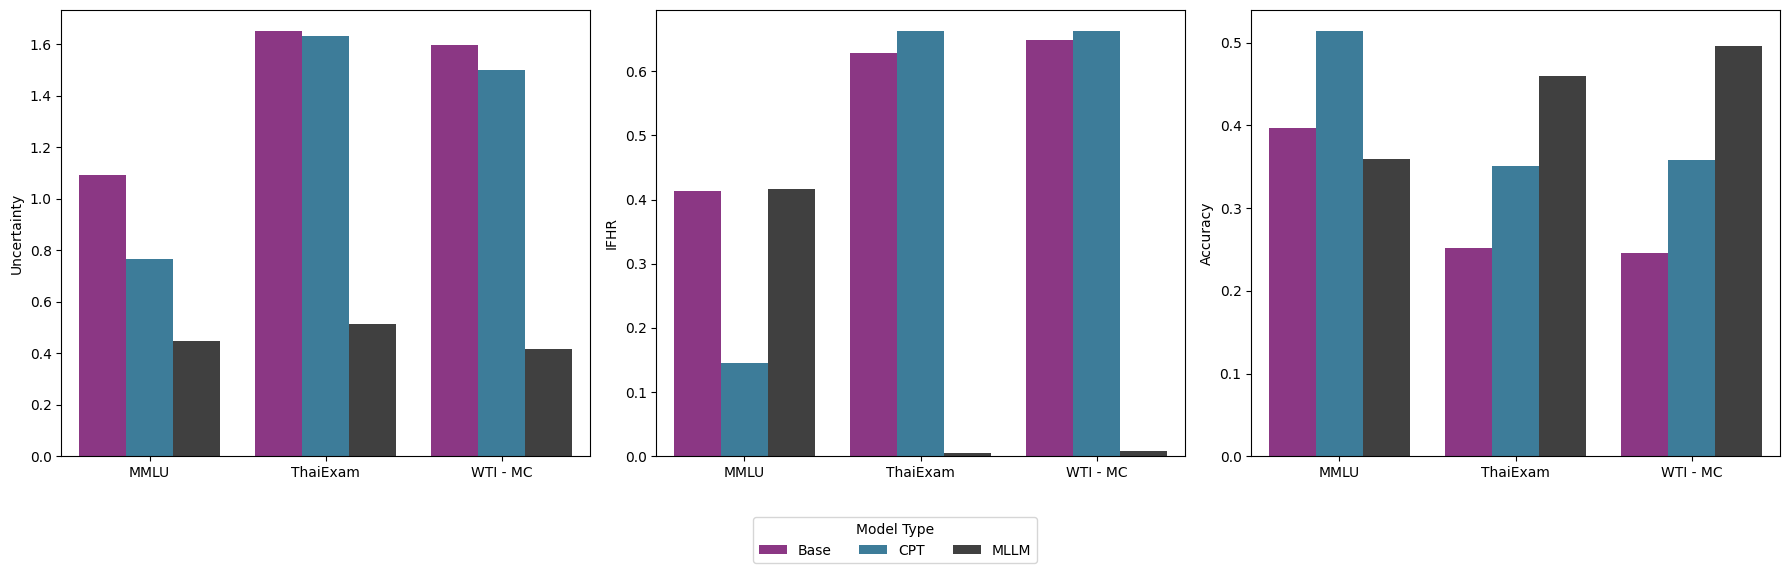

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


metrics = ["Uncertainty", "IFHR", "Accuracy"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, metric in zip(axes, metrics):
    metric_to_show, metric_to_use = handle_metric_name(metric)
    sns.barplot(
        x="task", 
        y=metric_to_use,
        data=result["short"], 
        hue="model_type", 
        errorbar=None,
        palette=["#992990", "#2E82A8", "#404040"],
        ax=ax,
    )
    ax.set_xlabel("")
    ax.set_ylabel(metric_to_show)
    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Model Type", loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.tight_layout()
plt.show()